In [1]:
import xtb 


[11:42:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[11:42:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[11:42:47] Explicit valence for atom # 6 N, 4, is greater than permitted
[11:42:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 16
[11:42:47] Can't kekulize mol.  Unkekulized atoms: 9 10 11 15 16
[11:42:47] Explicit valence for atom # 6 N, 4, is greater than permitted
[11:42:47] Explicit valence for atom # 1 C, 6, is greater than permitted
[11:42:47] Explicit valence for atom # 8 N, 4, is greater than permitted
[11:42:47] Explicit valence for atom # 8 N, 4, is greater than permitted
[11:42:47] Explicit valence for atom # 6 N, 5, is greater than permitted
[11:42:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 13
[11:42:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 7 8
[11:42:47] Explicit valence for atom # 1 N, 4, is greater than permitted
[11:42:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[11:42:47] Explicit 

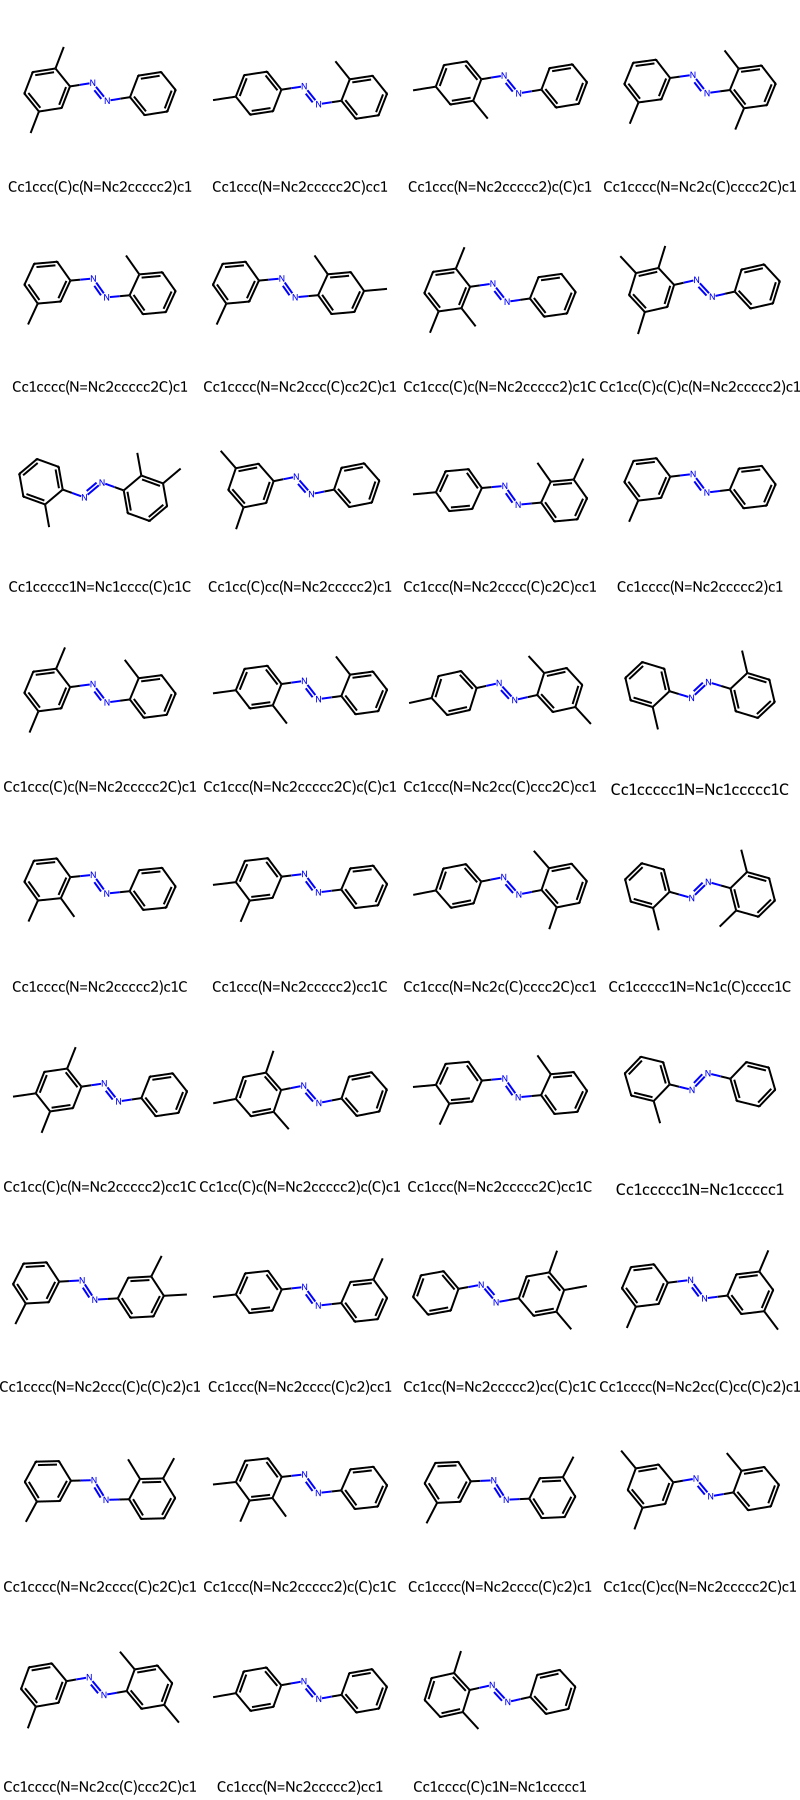

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from itertools import product

# Load the azobenzene structure
azobenzene = Chem.MolFromSmiles('C1=CC=C(C=C1)N=NC2=CC=CC=C2')

# Generate SMILES for substituents, e.g., methyl (-CH3), ethyl (-C2H5)
substituents = [Chem.MolFromSmiles('C'), Chem.MolFromSmiles('CC')]

# Choose the atom indexes where substituents should be added
atom_indexes = [2, 4, 5, 6, 9, 10, 11, 12, 13]

# Generate variations by adding substituents
variations = []
for num_substituents in range(1, 4):  # Loop over 1, 2, and 3 substituents
    for index_combination in product(atom_indexes, repeat=num_substituents):  # Combinations of atom indices
        for substituent_combination in product(substituents, repeat=num_substituents):  # Combinations of substituents
            # Create editable molecule
            molecule = Chem.EditableMol(azobenzene)

            for i, (index, substituent) in enumerate(zip(index_combination, substituent_combination)):
                # Add substituent
                molecule.AddAtom(substituent.GetAtomWithIdx(0))
                molecule.AddBond(index, azobenzene.GetNumAtoms() + i, order=Chem.rdchem.BondType.SINGLE)

            # Convert back to molecule
            new_molecule = molecule.GetMol()

            # Generate 2D coordinates for visualization
            AllChem.Compute2DCoords(new_molecule)

            # Append to variations
            variations.append(new_molecule)

# Convert variations to canonical SMILES and remove duplicates
variations_smiles = {Chem.MolToSmiles(mol, canonical=True) for mol in variations}
unique_variations = [Chem.MolFromSmiles(smiles) for smiles in variations_smiles]

valid_variations = []
for variation in unique_variations:
    try:
        Chem.SanitizeMol(variation)  # This will throw an exception for invalid molecules
        valid_variations.append(variation)
    except:
        continue

# Draw and display the variations
Draw.MolsToGridImage(valid_variations, molsPerRow=4, subImgSize=(200,200), legends=[Chem.MolToSmiles(mol) for mol in valid_variations])


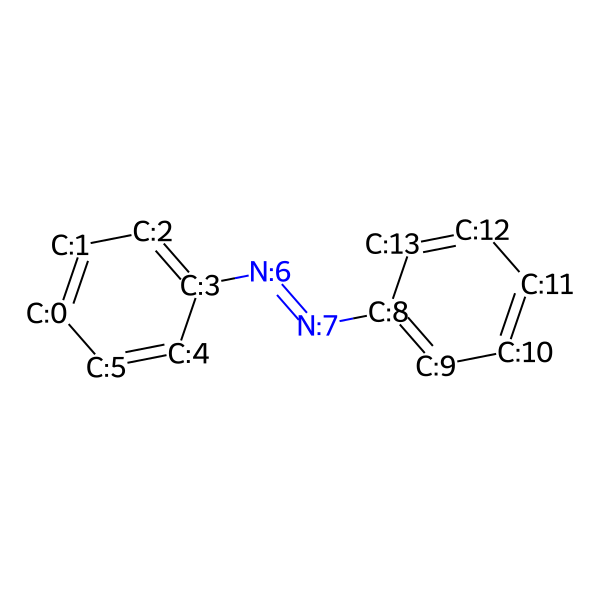

In [10]:
# Load the azobenzene structure
azobenzene = Chem.MolFromSmiles('C1=CC=C(C=C1)N=NC2=CC=CC=C2')

# Add atom index property to each atom
for atom in azobenzene.GetAtoms():
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))

# Draw the molecule
Draw.MolToImage(azobenzene, size=(600,600))



In [19]:
import sys
import pandas as pd
sys.path.append("/groups/kemi/brq616/speciale/opt/xTB/tQMC/QMC")
import qmconf
from qmmol import QMMol
from qmconf import QMConf

In [20]:
dataframe = pd.read_pickle("/groups/kemi/brq616/speciale/smiles_batch-2_new.pkl")

In [21]:
dataframe

,rep,reac,prod,scan_TSa,scan_TSb,scan_TSc,storage,tbr_a,tbr_b,tbr_c
0,azobenzene_5,<qmconf.QMConf object at 0x7fb061e33820>,<qmconf.QMConf object at 0x7fb061e335b0>,<qmconf.QMConf object at 0x7fb061679510>,<qmconf.QMConf object at 0x7fb061679660>,<qmconf.QMConf object at 0x7fb0616796c0>,20.989083,4.971981,3.757083,2.392663


In [22]:
TSa = dataframe.scan_TSa

In [30]:
TSa[0].write_xyz

<bound method QMConf.write_xyz of <qmconf.QMConf object at 0x7fb061679510>>